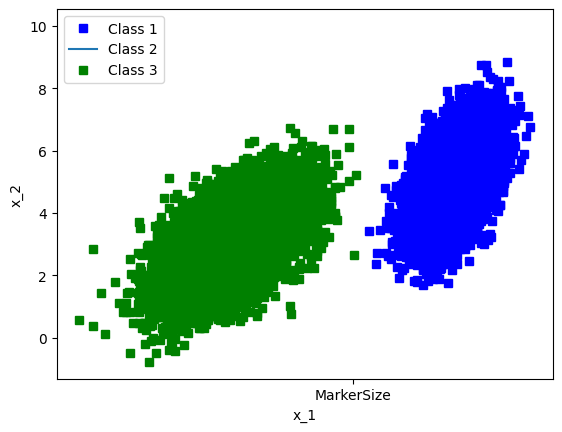

In [127]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'gs','MarkerSize',10)
#plt.plot(X_2[:,0],X_2[:,1],'rs','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show

# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

In [120]:
# My code!
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

# Least Squares method
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T
t = np.array([train_dataset[:,2],train_dataset[:,3]]).T
W = np.linalg.inv(x.T@x)@x.T@t
y = np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T

# Computing y
for i in range(len(train_dataset)):
    x = np.array([1,train_dataset[i,0],train_dataset[i,1]])
    y[i] = W.T@x
    np.append(y,W.T@x)

# Calculating t
t_calc = np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T
classification_errors = 0

# the perceptron borrowed from oliver
for i, classification in enumerate(y):
    if np.argmax(classification) == np.argmax(t[i]):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1

print(classification_errors)




0


Exercise 1.2

In [121]:
# creating data with 3 classes

C_1 = np.matlib.repmat([0,1,0],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0,0],L,1); # generate labels for Class 2
C_3 = np.matlib.repmat([0,0,1],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2,C_3))
X = np.concatenate((X_1,X_2,X_3))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x5 with
# x_1,x_2,c_1,c_2,c_3

In [122]:
# It is not really different between 2 and 3 classes
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

# Least Squares method
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T
t = np.array([train_dataset[:,2],train_dataset[:,3],train_dataset[:,4]]).T # t is 1 longer
W = np.linalg.inv(x.T@x)@x.T@t
y = np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T # y is 1 longer

for i in range(len(train_dataset)):
    x = np.array([1,train_dataset[i,0],train_dataset[i,1]])
    y[i] = W.T@x
    np.append(y,W.T@x)

classification_errors = 0

# the perceptron borrowed from oliver
for i, classification in enumerate(y):
    if np.argmax(classification) == np.argmax(t[i]):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1

print(classification_errors)


10


Exercise 2

In [123]:
# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

6


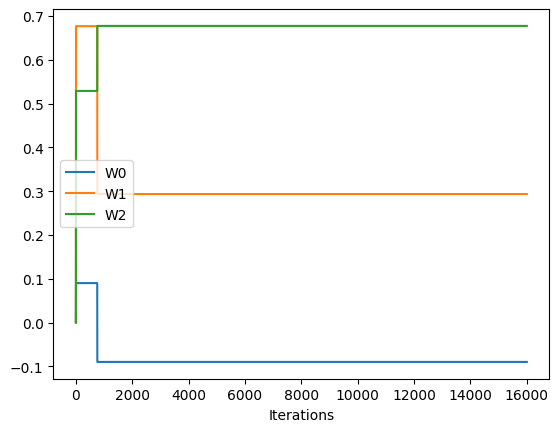

In [124]:
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

L_iter = 10000
eta = 0.09
#print(data_set[0:10,3])
# Perceptron
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

W =  np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T
t = train_dataset[:,3]
for i in range(len(t)):
    if t[i] == 0:
        t[i] = -1
#e = np.zeros(len(train_dataset))
#print(e.shape)
for i in range(len(train_dataset)-1):
    y = np.sign(W[i].T@x[i])
    e = t[i]-y
    W[i+1] = W[i] + eta*e*x[i]

plt.plot(W)
plt.xlabel('Iterations')
plt.legend(['W0','W1','W2'])

t_test =test_dataset[:,3]
for i in range(len(t_test)):
    if t_test[i] == 0:
        t_test[i] = -1
x_test = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T

classification_errors = 0
for i, classification in enumerate(t_test):
    if W[i]@x_test[i].T*classification > 0:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(classification_errors)


Opgave 3

In [125]:
# Classification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

7956


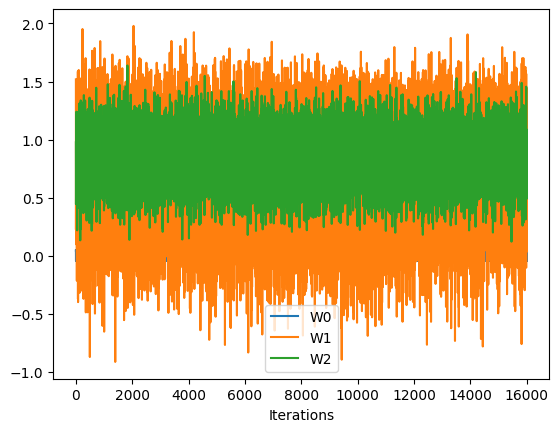

In [132]:
# My code!
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

W =  np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T
t = train_dataset[:,2]
eta = 0.09
x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

t_calc = np.zeros(len(t))
for k in range(len(t)):
    y = 1/(1 + np.exp(W[k].T@x[k]))
    if y > 1-y:
        t_calc[k]=0
    else:
        t_calc[k] = 1 
    e = (y-t[k])*x[k]
    W[k] = W[k] + eta*e*x[i]

plt.plot(W)
plt.xlabel('Iterations')
plt.legend(['W0','W1','W2'])


x_test = np.array([np.ones(len(test_dataset)),test_dataset[:,0],test_dataset[:,1]]).T

classification_errors = 0
for i, classification in enumerate(t):
    if t_calc[i] == classification:
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(classification_errors)




In [ ]:
# # Least Squares method
# x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T
# t = np.array([train_dataset[:,2],train_dataset[:,3]]).T
# W = np.linalg.inv(x.T@x)@x.T@t
# y = np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T

# # Computing y
# for i in range(len(train_dataset)):
#     x = np.array([1,train_dataset[i,0],train_dataset[i,1]])
#     y[i] = W.T@x
#     np.append(y,W.T@x)

# # Calculating t
# t_calc = np.array([np.zeros(len(train_dataset)),np.zeros(len(train_dataset))]).T
# classification_errors = 0

# # the perceptron borrowed from oliver
# for i, classification in enumerate(y):
#     if np.argmax(classification) == np.argmax(t[i]):
#         # Succes!
#         continue
#     else:
#         classification_errors = classification_errors + 1

# print(classification_errors)
